In [89]:
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D, ZeroPadding2D
from keras.layers.normalization import BatchNormalization
from keras.layers import LSTM
from PIL import Image
import random
import math
import matplotlib.pyplot as plt

In [90]:
training_data = np.load('./output/training_data.npy')
training_labels = np.load('./output/training_dists.npy')

#pad the training data matrix so it is 100x1024

#(500, 100, 1000, 1)

# zero_padding_array = np.zeros((500,100,600,1))

In [91]:
training_data.shape

(50000, 1000, 1)

In [92]:
training_labels.shape

(50000, 100, 1)

In [93]:
training_labels_padding_zero = np.zeros(training_data.shape)

In [94]:
training_labels_padding_zero[:training_labels.shape[0], :training_labels.shape[1], :training_labels.shape[2]] = training_labels

In [95]:
training_labels_padding_zero.shape

(50000, 1000, 1)

In [96]:
training_labels = training_labels_padding_zero

In [97]:
# print(training_data.shape)
# training_data = np.concatenate([training_data, zero_padding_array], axis=2)
print(training_data.shape)
print(training_labels.shape)

samples_count = training_data.shape[0]

train_size = math.floor(0.85*training_data.shape[0])

shuffle_indices = random.sample(range(0, samples_count), samples_count)

indices_train = shuffle_indices[0:train_size]
indices_test = shuffle_indices[train_size:samples_count]

X_train = training_data[indices_train,:]
Y_train = training_labels[indices_train]

X_test = training_data[indices_test,:]
Y_test = training_labels[indices_test]

print('X_train.shape : ', X_train.shape)
print('X_test.shape : ', X_test.shape)

print('Y_train.shape : ', Y_train.shape)
print('Y_test.shape : ', Y_test.shape)

np.save('./output/X_test.npy', X_test)
np.save('./output/Y_test.npy', Y_test)

(50000, 1000, 1)
(50000, 1000, 1)
X_train.shape :  (42500, 1000, 1)
X_test.shape :  (7500, 1000, 1)
Y_train.shape :  (42500, 1000, 1)
Y_test.shape :  (7500, 1000, 1)


In [98]:
model = Sequential()

model.add(LSTM(1, input_shape=(1000, 1), return_sequences=True, activation='sigmoid'))
model.add(LSTM(1, input_shape=(1000, 1), return_sequences=True, activation='sigmoid'))
model.add(LSTM(1, input_shape=(1000, 1), return_sequences=True, activation='sigmoid'))
model.add(LSTM(1, input_shape=(1000, 1), return_sequences=True, activation='sigmoid'))
model.add(LSTM(1, input_shape=(1000, 1), return_sequences=True, activation='sigmoid'))
model.add(LSTM(1, input_shape=(1000, 1), return_sequences=True, activation='sigmoid'))

In [99]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_33 (LSTM)               (None, 1000, 1)           12        
_________________________________________________________________
lstm_34 (LSTM)               (None, 1000, 1)           12        
_________________________________________________________________
lstm_35 (LSTM)               (None, 1000, 1)           12        
_________________________________________________________________
lstm_36 (LSTM)               (None, 1000, 1)           12        
_________________________________________________________________
lstm_37 (LSTM)               (None, 1000, 1)           12        
_________________________________________________________________
lstm_38 (LSTM)               (None, 1000, 1)           12        
Total params: 72
Trainable params: 72
Non-trainable params: 0
_________________________________________________________

In [100]:
# (4) Compile 
#model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])
model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

In [101]:
# (5) Train
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), batch_size=1000, epochs=15, verbose=1)


model.save('./output/CNN_model_03.h5')

Train on 42500 samples, validate on 7500 samples
Epoch 1/15
42500/42500 [==============================] - 110s 3ms/step - loss: 0.1085 - accuracy: 0.9647 - val_loss: 0.1015 - val_accuracy: 0.9651
Epoch 2/15
42500/42500 [==============================] - 104s 2ms/step - loss: 0.0982 - accuracy: 0.9647 - val_loss: 0.0921 - val_accuracy: 0.9651
Epoch 3/15
42500/42500 [==============================] - 103s 2ms/step - loss: 0.0895 - accuracy: 0.9647 - val_loss: 0.0842 - val_accuracy: 0.9651
Epoch 4/15
42500/42500 [==============================] - 102s 2ms/step - loss: 0.0823 - accuracy: 0.9647 - val_loss: 0.0775 - val_accuracy: 0.9651
Epoch 5/15
42500/42500 [==============================] - 101s 2ms/step - loss: 0.0761 - accuracy: 0.9647 - val_loss: 0.0719 - val_accuracy: 0.9651
Epoch 6/15
42500/42500 [==============================] - 100s 2ms/step - loss: 0.0708 - accuracy: 0.9647 - val_loss: 0.0670 - val_accuracy: 0.9651
Epoch 7/15
42500/42500 [==============================] - 101s 

In [103]:
training_result = model.evaluate(X_train, Y_train, batch_size = 1000)
testing_result = model.evaluate(X_test, Y_test, batch_size = 1000)

7500/7500 [==============================] - 7s 983us/step


In [104]:
print('Training Acc: ', training_result)
print('Testing Acc: ', testing_result)

Training Acc:  [0.04557227540542098, 0.9646535515785217]
Testing Acc:  [0.04414224127928416, 0.965090811252594]


In [106]:
X_test_results = model.predict(X_test)

In [121]:
# plt.scatter(range(100), X_test_results[0].reshape(), c='r')
# plt.scatter(range(100), Y_test[0], c='g')

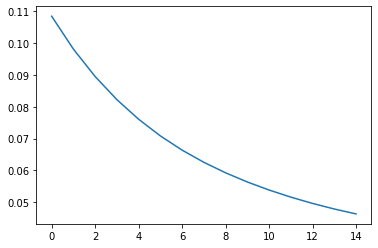

In [105]:
plt.plot(history.history['loss'])
plt.show()